In [1]:
import numpy as np
import pandas as pd
import os as os

In [2]:
folder_path = os.getcwd()

dataframes = []

merged_df = pd.DataFrame()

# Read the first CSV file separately to obtain the common columns
first_file = True
common_columns = set()

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dataframes.append(df)
        
        # Get the common columns
        if first_file:
            common_columns = set(df.columns)
            first_file = False
        else:
            common_columns = common_columns.intersection(set(df.columns))

# Merge the DataFrames using only the common columns
merged_df = pd.concat(dataframes, join='inner', ignore_index=True)
merged_df = merged_df[list(common_columns)]

In [3]:
merged_df.head()

,psu,month_income,qtype,pre_ele_97,edu,birth_year,religion,ssu,year_m,id,...,taiwan_indep,taiwanese_or_chinese,stratum2,gender,marriage,zip,mothe_house_income,year,wave,wsel
0,4,2-3萬元以下,卷二,沒有去投票,高職(續答b2),75,沒有宗教信仰,2.0,101,1040105,...,永遠維持現狀,台灣人,都會核心,男,單身且從沒結過婚(跳答a15),台北市中山區,7-8萬元以下,2012,603,0.781203
1,4,沒有工作,卷二,謝長廷,高職(續答b2),45,沒有宗教信仰,2.0,101,1040107,...,"維持現狀,以後走向獨立",台灣人,都會核心,男,已婚有偶(續答a11),台北市中山區,拒答,2012,603,0.781203
2,4,沒有工作,卷二,馬英九,三專(續答b2),37,佛教,2.0,101,1040110,...,永遠維持現狀,都是,都會核心,男,已婚有偶(續答a11),台北市中山區,5-6萬元以下,2012,603,0.781203
3,4,"有工作,但沒有收入",卷二,馬英九,國(初)中(續答b2),45,民間信仰,2.0,101,1040111,...,永遠維持現狀,都不是,都會核心,女,已婚有偶(續答a11),台北市中山區,5-6萬元以下,2012,603,0.781203
4,4,3-4萬元以下,卷二,謝長廷,大學(續答b2),70,沒有宗教信仰,2.0,101,1040112,...,"維持現狀,以後走向統一",台灣人,都會核心,男,單身且從沒結過婚(跳答a15),台北市中山區,7-8萬元以下,2012,603,0.781203


In [4]:
merged_df['taiwanese_or_chinese'].value_counts()

taiwanese_or_chinese
台灣人               3987
都是                 642
兩者都是               472
兩者都是:是台灣人也是中國人     455
中國人                144
兩者都是:是中國人也是台灣人      72
不知道                 27
都不是                 25
都不是,請說明             23
拒答                  19
兩者都不是,請說明           14
其他                   8
無法選擇                 7
無法決定                 3
不瞭解題意                1
Name: count, dtype: int64

In [5]:
# Specify the values you want to filter rows by
specified_values = ['台灣人', '都是', '兩者都是', '中國人', '兩者都是:是中國人也是台灣人', '兩者都是:是台灣人也是中國人']

# Extract rows with the specified values
merged_df = merged_df[merged_df['taiwanese_or_chinese'].isin(specified_values)]

# Print the filtered dataframe
merged_df['taiwanese_or_chinese'].value_counts()

taiwanese_or_chinese
台灣人               3987
都是                 642
兩者都是               472
兩者都是:是台灣人也是中國人     455
中國人                144
兩者都是:是中國人也是台灣人      72
Name: count, dtype: int64

In [6]:
# Define the values to be replaced and the replacement string
values_to_replace = merged_df['taiwanese_or_chinese'].unique()
values_to_remove = np.array(['中國人', '台灣人'])

values_to_replace = values_to_replace[~np.isin(values_to_replace, values_to_remove)]
replacement_string = '兩者'

merged_df = merged_df.replace(values_to_replace, replacement_string)
merged_df['taiwanese_or_chinese'].value_counts()

taiwanese_or_chinese
台灣人    3987
兩者     1641
中國人     144
Name: count, dtype: int64

In [7]:
# Define the values to be replaced and the replacement string
values_to_replace = ['國民黨(跳答h7)', '泛藍']
replacement_string = '國民黨'

# Replace the values with the replacement string
merged_df = merged_df.replace(values_to_replace, replacement_string)

# Define the values to be replaced and the replacement string
values_to_replace = ['民進黨(跳答h7)', '泛綠']
replacement_string = '民進黨'

# Replace the values with the replacement string
merged_df = merged_df.replace(values_to_replace, replacement_string)


merged_df['political_party'].value_counts()


political_party
都沒有___都支持      1138
都差不多           1073
國民黨             969
都沒有/都支持         831
跳答              743
民進黨             721
不知道              83
拒答               74
無黨籍(跳答h7)        41
有偏向政黨,不願意回答      21
親民黨              13
親民黨(跳答h7)        12
有支持政黨,但不回答       12
綠黨               11
台聯黨               9
其他政黨,請說明          8
新黨                6
新黨(跳答h7)          2
台聯(跳答h7)          2
建國黨               1
其他                1
台聯                1
Name: count, dtype: int64

In [8]:
# Define the values to be replaced and the replacement string
values_to_replace = merged_df['political_party'].unique()
values_to_remove = np.array(['民進黨', '國民黨'])

values_to_replace = values_to_replace[~np.isin(values_to_replace, values_to_remove)]
replacement_string = '其他'

merged_df = merged_df.replace(values_to_replace, replacement_string)
merged_df['political_party'].value_counts()


political_party
其他     4082
國民黨     969
民進黨     721
Name: count, dtype: int64

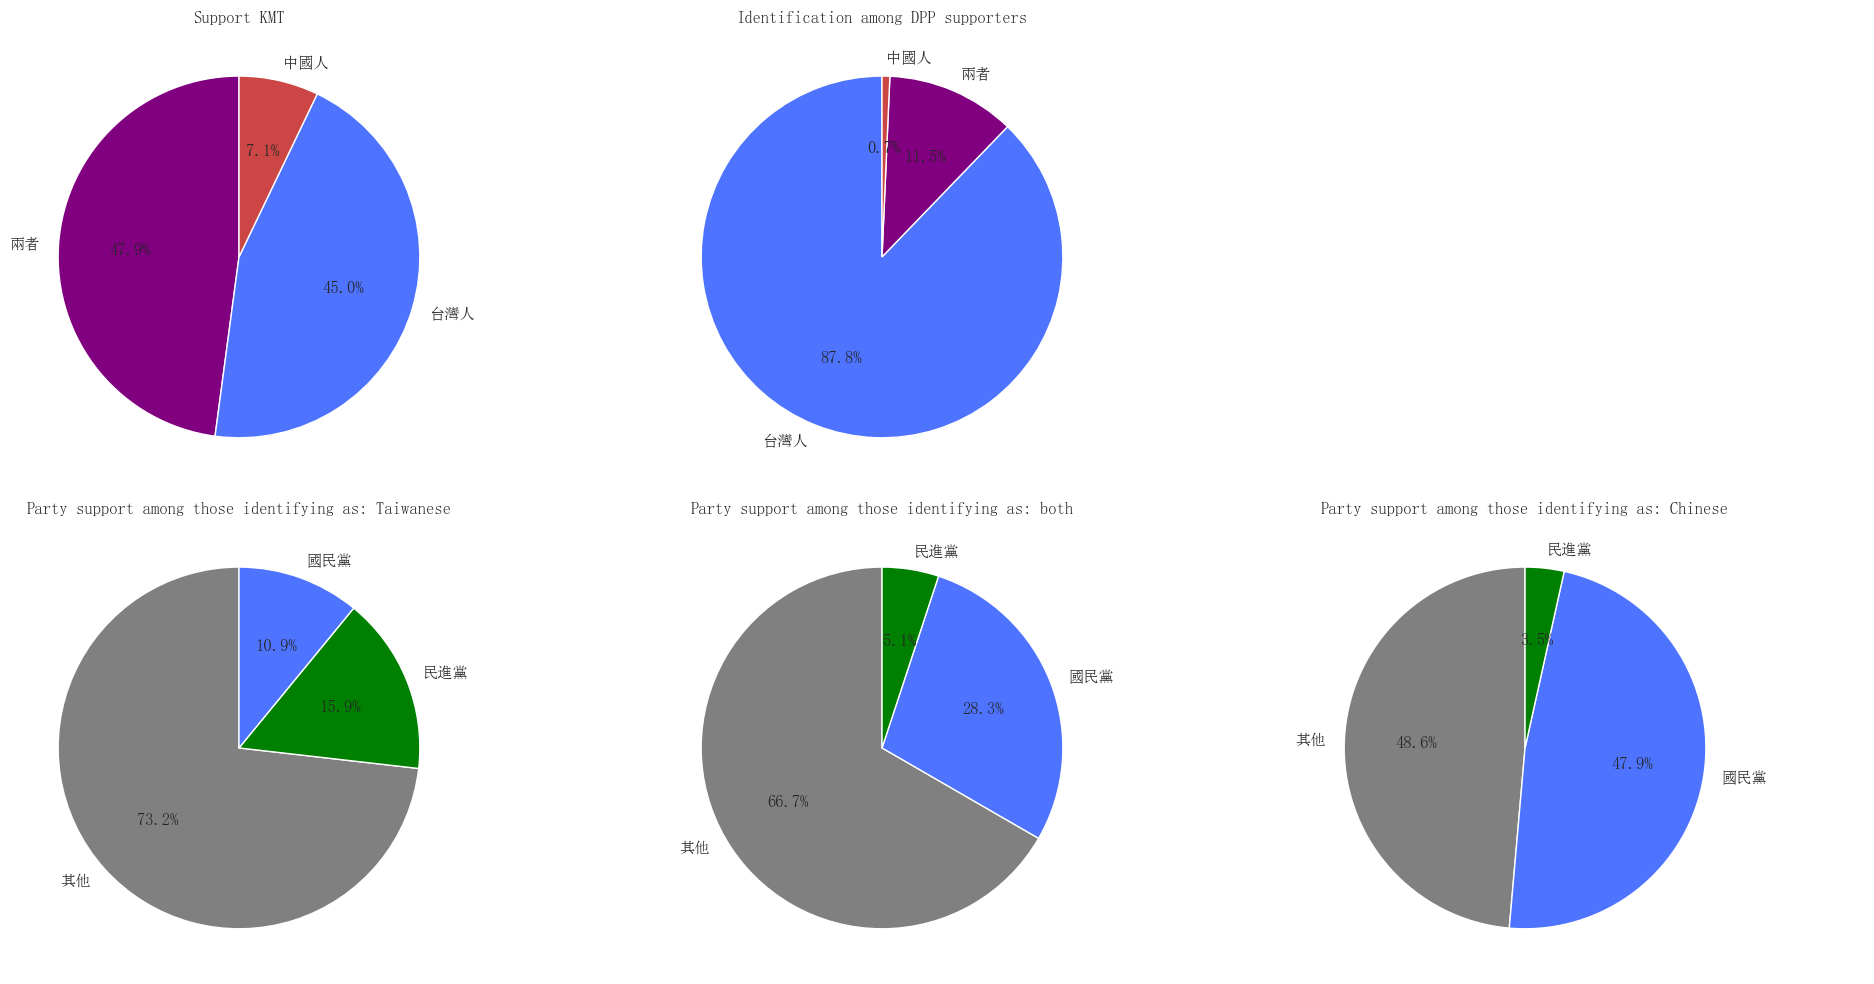

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.set(font="SimSun")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

kmt_ratios = merged_df[merged_df['political_party'] == '國民黨']
dpp_ratios = merged_df[merged_df['political_party'] == '民進黨']
taiwan_ratios = merged_df[merged_df['taiwanese_or_chinese'] == '台灣人']
china_ratios = merged_df[merged_df['taiwanese_or_chinese'] == '中國人']
both_ratios = merged_df[merged_df['taiwanese_or_chinese'] == '兩者']


axes[0, 0].pie(kmt_ratios['taiwanese_or_chinese'].value_counts(), labels=kmt_ratios['taiwanese_or_chinese'].value_counts().index, colors=["purple", "#4E74FF", "#CB4644"], autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Support KMT')

axes[0, 1].pie(dpp_ratios['taiwanese_or_chinese'].value_counts(), labels=dpp_ratios['taiwanese_or_chinese'].value_counts().index, colors=["#4E74FF", "purple", "#CB4644"], autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Identification among DPP supporters')

axes[1, 0].pie(taiwan_ratios['political_party'].value_counts(), labels=taiwan_ratios['political_party'].value_counts().index, colors=["gray", "green", "#4E74FF"], autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Party support among those identifying as: Taiwanese')

axes[1, 2].pie(china_ratios['political_party'].value_counts(), labels=china_ratios['political_party'].value_counts().index, colors=["gray", "#4E74FF", "green"], autopct='%1.1f%%', startangle=90)
axes[1, 2].set_title('Party support among those identifying as: Chinese')

axes[1, 1].pie(both_ratios['political_party'].value_counts(), labels=both_ratios['political_party'].value_counts().index, colors=["gray", "#4E74FF", "green"],autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Party support among those identifying as: both')

axes[0, 2].axis('off')

plt.tight_layout()



In [10]:
# Specify the values you want to filter rows by
specified_values = ['國民黨', '民進黨']

# Extract rows with the specified values
merged_df = merged_df[merged_df['political_party'].isin(specified_values)]

# Print the filtered dataframe
merged_df['political_party'].value_counts()

political_party
國民黨    969
民進黨    721
Name: count, dtype: int64

In [11]:
import sklearn.model_selection
from sklearn.linear_model import LogisticRegression
import sklearn.datasets
import sklearn.metrics
from imblearn.under_sampling import RandomUnderSampler #For sampling equal number of data points from each class

X = pd.DataFrame(merged_df['taiwanese_or_chinese'])
y = pd.DataFrame(merged_df['political_party'])

X = pd.get_dummies(X, columns=['taiwanese_or_chinese']).astype("int64")
y = pd.get_dummies(y, columns=['political_party'])

y = y.astype({'political_party_國民黨': 'int64', 'political_party_民進黨': 'int64',})

y_green = y.drop(columns=['political_party_國民黨'])
y_blue = y.drop(columns=['political_party_民進黨'])
#y_other = y.drop(columns=['political_party_國民黨', 'political_party_民進黨'])

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=2023)

# Resample the dataset
X_sampled_green, y_green = rus.fit_resample(X, y_green)
X_sampled_blue, y_blue = rus.fit_resample(X, y_blue)
#X_sampled_other, y_other = rus.fit_resample(X, y_other)


In [12]:
print(X.shape)
print(y.shape)
print(X_sampled_green.shape)
print(X_sampled_blue.shape)
print(y_blue.shape)
print(y_green.shape)


(1690, 3)
(1690, 2)
(1442, 3)
(1442, 3)
(1442, 1)
(1442, 1)


In [13]:
model = LogisticRegression()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_sampled_green, y_green, test_size = 0.05, random_state=1)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

print(model.coef_)


Accuracy score 0.7123287671232876
[[-1.12414497 -0.49836819  1.62251436]]


c:\Users\faust\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
X_test.columns

Index(['taiwanese_or_chinese_中國人', 'taiwanese_or_chinese_兩者',
       'taiwanese_or_chinese_台灣人'],
      dtype='object')

In [15]:
new_pred = model.predict([[0, 0, 1]])
if new_pred:
    print("This person is most likely to identify as a member of the DPP")
else:
    print("This person is most likely to identify as not a member of the DPP")

This person is most likely to identify as a member of the DPP


c:\Users\faust\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [16]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_sampled_blue, y_blue, test_size = 0.05, random_state=1)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

print(model.coef_)

Accuracy score 0.7671232876712328
[[ 1.12786181  0.45756931 -1.58544076]]


c:\Users\faust\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
